In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegressionCV

# Load the dataset
df = pd.read_csv('spam.csv', encoding='latin-1')


In [2]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
print("\nMissing values:")
df.isnull().sum()


Missing values:


v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

What are the initial steps for data exploration and preprocessing?

In [4]:
# Encode the target variable 'v1' (spam or ham) using LabelEncoder
label_encoder = LabelEncoder()
df['v1'] = label_encoder.fit_transform(df['v1'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['v2'], df['v1'], test_size=0.2, random_state=42)

How do we build a pipeline for Lasso Logistic Regression and train the model?

In [5]:
# Build a pipeline with CountVectorizer and Lasso Logistic Regression
model = make_pipeline(CountVectorizer(), LogisticRegression(penalty='l1', solver='liblinear'))

# Train the model
model.fit(X_train, y_train)


Pipeline(steps=[('countvectorizer', CountVectorizer()),
                ('logisticregression',
                 LogisticRegression(penalty='l1', solver='liblinear'))])

What is the accuracy of the Lasso Logistic Regression model on the test set?

In [6]:
# Evaluate the model on the test set
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy on Test Set: {accuracy:.2%}")


Model Accuracy on Test Set: 97.49%


How can we fine-tune the Lasso Logistic Regression model using cross-validation?

In [7]:
# Build a pipeline with CountVectorizer and Lasso Logistic Regression with cross-validation
model_cv = make_pipeline(CountVectorizer(), LogisticRegressionCV(penalty='l1', solver='liblinear'))

# Train the model with cross-validation
model_cv.fit(X_train, y_train)

# Evaluate the cross-validated model on the test set
accuracy_cv = model_cv.score(X_test, y_test)
print(f"Cross-Validated Model Accuracy on Test Set: {accuracy_cv:.2%}")


Cross-Validated Model Accuracy on Test Set: 98.03%


How can we analyze the important features selected by Lasso Logistic Regression?

In [8]:
# Extracting feature names from CountVectorizer
feature_names = model.named_steps['countvectorizer'].get_feature_names_out()

# Extracting coefficients from the trained Lasso Logistic Regression model
coefficients = model.named_steps['logisticregression'].coef_[0]

# Display top 10 important features
top_features = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
top_features = top_features.sort_values(by='Coefficient', ascending=False)
print("\nTop 10 Important Features:")
print(top_features.head(10))



Top 10 Important Features:
       Feature  Coefficient
5771  ringtone     4.210925
7090        uk     4.159663
7065       txt     3.809937
630        800     3.652882
3536      http     3.405906
1827     claim     3.097780
529         50     2.818539
1064   arsenal     2.513505
695      88066     2.441528
6004   service     2.406241


How can we make predictions on new data using the trained Lasso Logistic Regression model?

In [9]:
# Example: Make predictions on new emails
new_emails = ["Get a special discount today!", "Meeting at 3 PM"]
predictions = model.predict(new_emails)
predicted_labels = label_encoder.inverse_transform(predictions)

print("\nPredictions for New Emails:")
for email, label in zip(new_emails, predicted_labels):
    print(f"Email: {email}, Predicted Label: {label}")



Predictions for New Emails:
Email: Get a special discount today!, Predicted Label: ham
Email: Meeting at 3 PM, Predicted Label: ham


How can we evaluate the precision, recall, and F1-score of the Lasso Logistic Regression model?

In [10]:
from sklearn.metrics import classification_report

# Generate classification report
y_pred = model.predict(X_test)
classification_rep = classification_report(y_test, y_pred, target_names=['Ham', 'Spam'])
print("\nClassification Report:")
print(classification_rep)



Classification Report:
              precision    recall  f1-score   support

         Ham       0.98      1.00      0.99       965
        Spam       0.97      0.84      0.90       150

    accuracy                           0.97      1115
   macro avg       0.97      0.92      0.94      1115
weighted avg       0.97      0.97      0.97      1115



How can we perform hyperparameter tuning for the Lasso Logistic Regression model?

In [11]:
# Example of hyperparameter tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {'logisticregression__C': [0.1, 1, 10]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Display the best hyperparameters
best_params = grid_search.best_params_
print("\nBest Hyperparameters:")
print(best_params)

# Evaluate the model with the best hyperparameters on the test set
best_model = grid_search.best_estimator_
accuracy_best = best_model.score(X_test, y_test)
print(f"Model Accuracy with Best Hyperparameters: {accuracy_best:.2%}")



Best Hyperparameters:
{'logisticregression__C': 10}
Model Accuracy with Best Hyperparameters: 98.12%


How can we visualize the ROC curve for the Lasso Logistic Regression model?

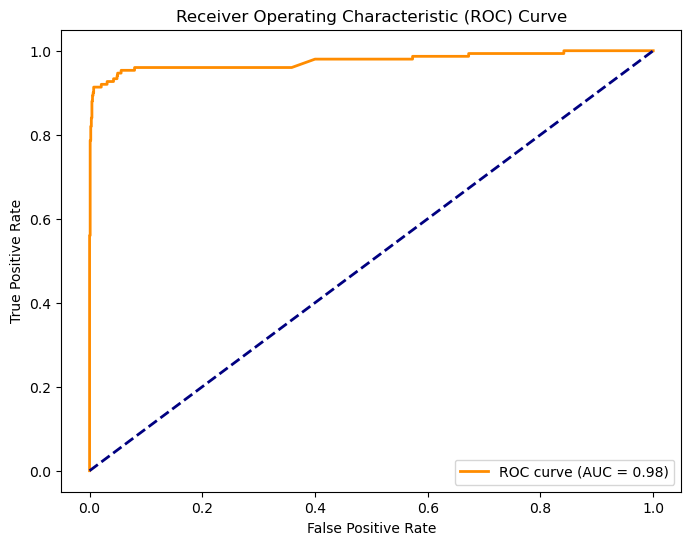

In [13]:
import matplotlib.pyplot as plt
# Import necessary libraries for ROC curve
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_probs = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and area under the curve (AUC)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


How can we perform feature selection using L1 regularization with different alpha values?

In [14]:
# Example: Feature selection with different alpha values
alphas = [0.1, 0.5, 1.0, 2.0]

for alpha in alphas:
    # Build a pipeline with CountVectorizer and Lasso Logistic Regression with specific alpha
    model_alpha = make_pipeline(CountVectorizer(), LogisticRegression(penalty='l1', solver='liblinear', C=1/alpha))
    
    # Train the model
    model_alpha.fit(X_train, y_train)
    
    # Display selected features and their coefficients
    selected_features = [feature_names[i] for i, coef in enumerate(model_alpha.named_steps['logisticregression'].coef_[0]) if coef != 0]
    print(f"\nFeatures selected with alpha={alpha}:")
    print(selected_features)



Features selected with alpha=0.1:
['00', '01223585236', '0207', '02073162414', '07090201529', '0800', '08000839402', '083', '08718726270', '0a', '100', '150p', '16', '18', '200', '2007', '20p', '24m', '300', '40', '4fil', '50', '500', '542', '6089', '800', '80488', '87077', '88066', '946', 'about', 'ac', 'access', 'actually', 'address', 'adrian', 'adult', 'all', 'allow', 'always', 'am', 'amp', 'and', 'answer', 'around', 'arsenal', 'ask', 'at', 'auction', 'award', 'awarded', 'babe', 'bak', 'band', 'barbie', 'beg', 'bid', 'bill', 'book', 'but', 'call', 'call2optout', 'callertune', 'callså', 'camera', 'can', 'cant', 'cash', 'champneys', 'chance', 'chat', 'choose', 'claim', 'code', 'collection', 'com', 'come', 'comes', 'companies', 'congrats', 'contact', 'content', 'cops', 'cost', 'cs', 'customer', 'da', 'dating', 'day', 'days', 'delivery', 'details', 'died', 'divorce', 'dob', 'don', 'dont', 'draw', 'eg', 'email', 'enjoy', 'every', 'ex', 'expires', 'explicit', 'explosive', 'filthy', 'firs

How can we visualize the change in coefficients with varying alpha values?

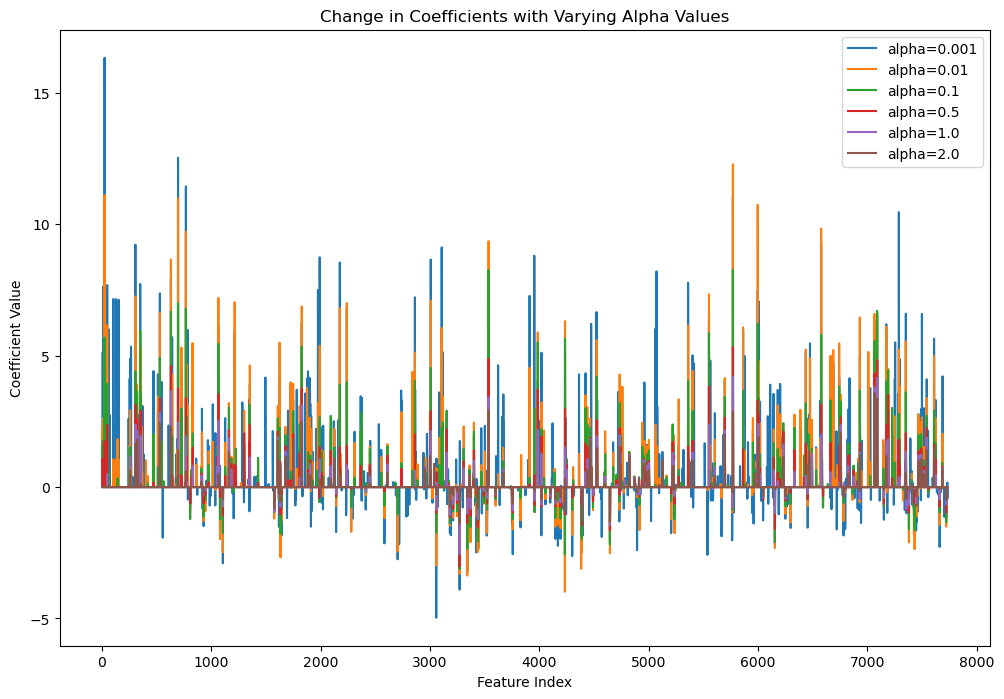

In [15]:
# Example: Visualizing coefficients with varying alpha values
alpha_values = [0.001, 0.01, 0.1, 0.5, 1.0, 2.0]

plt.figure(figsize=(12, 8))
for alpha in alpha_values:
    # Build a pipeline with CountVectorizer and Lasso Logistic Regression with specific alpha
    model_alpha = make_pipeline(CountVectorizer(), LogisticRegression(penalty='l1', solver='liblinear', C=1/alpha))
    
    # Train the model
    model_alpha.fit(X_train, y_train)
    
    # Extract coefficients
    coefficients_alpha = model_alpha.named_steps['logisticregression'].coef_[0]
    
    # Plot coefficients
    plt.plot(range(len(coefficients_alpha)), coefficients_alpha, label=f'alpha={alpha}')

plt.title('Change in Coefficients with Varying Alpha Values')
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Value')
plt.legend()
plt.show()


How can we handle imbalanced classes in spam detection using class weights?

In [16]:
# Build a pipeline with CountVectorizer and Lasso Logistic Regression with class weights
model_class_weights = make_pipeline(CountVectorizer(), LogisticRegression(penalty='l1', solver='liblinear', class_weight='balanced'))

# Train the model
model_class_weights.fit(X_train, y_train)

# Evaluate the model on the test set
accuracy_class_weights = model_class_weights.score(X_test, y_test)
print(f"\nModel Accuracy with Class Weights: {accuracy_class_weights:.2%}")



Model Accuracy with Class Weights: 98.21%


How can we interpret the results and make predictions with the Lasso Logistic Regression model?

In [17]:
# Example: Interpretation and predictions
example_text = ["Congratulations! You've won a prize.", "Please find attached the meeting minutes."]

# Transform the example text using CountVectorizer
example_text_transformed = model.named_steps['countvectorizer'].transform(example_text)

# Make predictions on the example text
predictions_example = model.named_steps['logisticregression'].predict(example_text_transformed)
predicted_labels_example = label_encoder.inverse_transform(predictions_example)

print("\nPredictions for Example Text:")
for text, label in zip(example_text, predicted_labels_example):
    print(f"Text: {text}, Predicted Label: {label}")



Predictions for Example Text:
Text: Congratulations! You've won a prize., Predicted Label: ham
Text: Please find attached the meeting minutes., Predicted Label: ham


How can we visualize the impact of different regularization strengths (C values) on model performance?

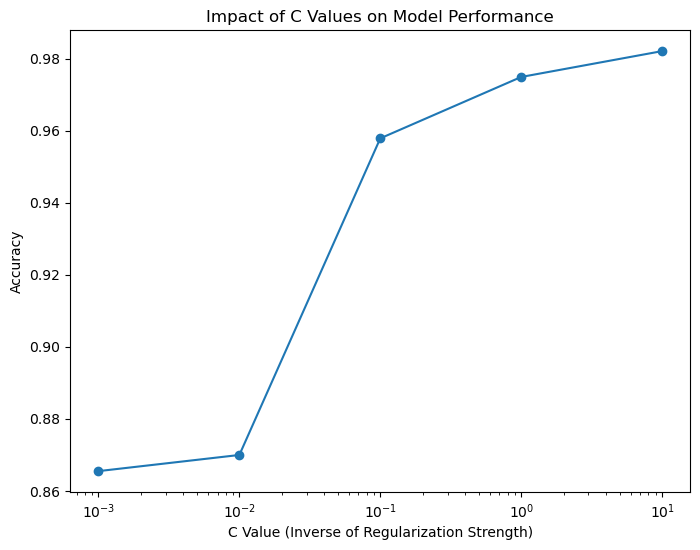

In [18]:
# Example: Visualizing the impact of different C values
C_values = [0.001, 0.01, 0.1, 1, 10]

accuracies = []

for C_value in C_values:
    # Build a pipeline with CountVectorizer and Lasso Logistic Regression with specific C value
    model_C = make_pipeline(CountVectorizer(), LogisticRegression(penalty='l1', solver='liblinear', C=C_value))
    
    # Train the model
    model_C.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    accuracy_C = model_C.score(X_test, y_test)
    accuracies.append(accuracy_C)

# Plot the impact of different C values on accuracy
plt.figure(figsize=(8, 6))
plt.plot(C_values, accuracies, marker='o')
plt.xscale('log')
plt.xlabel('C Value (Inverse of Regularization Strength)')
plt.ylabel('Accuracy')
plt.title('Impact of C Values on Model Performance')
plt.show()


How can we save and load the trained Lasso Logistic Regression model?

In [19]:
# Save the trained model to a file
import joblib

joblib.dump(model, 'lasso_logistic_regression_model.joblib')

# Load the saved model
loaded_model = joblib.load('lasso_logistic_regression_model.joblib')

# Example: Make predictions with the loaded model
predictions_loaded = loaded_model.predict(X_test)
accuracy_loaded = loaded_model.score(X_test, y_test)
print(f"\nModel Accuracy with Loaded Model: {accuracy_loaded:.2%}")



Model Accuracy with Loaded Model: 97.49%


How can we perform k-fold cross-validation to assess model performance?

In [20]:
# Example: Perform k-fold cross-validation
from sklearn.model_selection import cross_val_score

# Build a pipeline with CountVectorizer and Lasso Logistic Regression
model_cross_val = make_pipeline(CountVectorizer(), LogisticRegression(penalty='l1', solver='liblinear'))

# Perform 5-fold cross-validation
cross_val_scores = cross_val_score(model_cross_val, df['v2'], df['v1'], cv=5, scoring='accuracy')

# Display cross-validation scores
print("\nCross-Validation Scores:")
print(cross_val_scores)
print(f"Mean Accuracy: {cross_val_scores.mean():.2%}")



Cross-Validation Scores:
[0.9793722  0.98116592 0.97935368 0.98294434 0.97576302]
Mean Accuracy: 97.97%


 How can we visualize the learning curve to assess the model's performance?

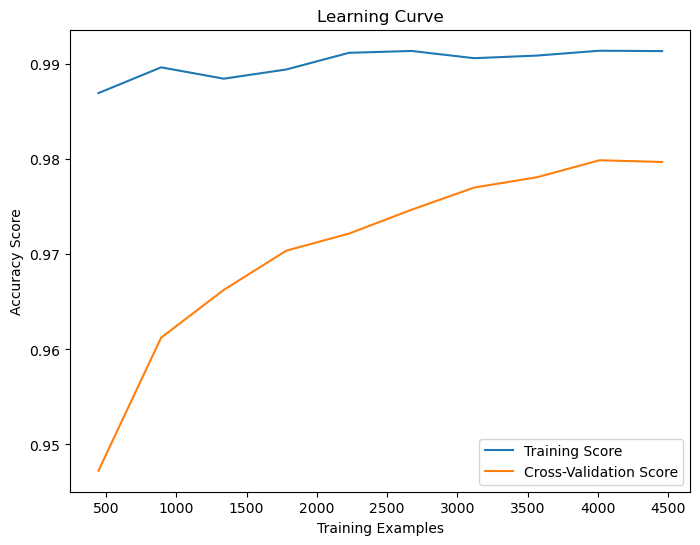

In [21]:
# Example: Visualize the learning curve
from sklearn.model_selection import learning_curve
import numpy as np

# Build a pipeline with CountVectorizer and Lasso Logistic Regression
model_learning_curve = make_pipeline(CountVectorizer(), LogisticRegression(penalty='l1', solver='liblinear'))

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(model_learning_curve, df['v2'], df['v1'], cv=5, train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate mean training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Score')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


How can we interpret the sparsity introduced by L1 regularization in feature selection?

In [22]:
# Example: Interpret sparsity in L1 regularization
# The higher the C value, the less regularization (more features selected)
C_values = [0.001, 0.01, 0.1, 1, 10]

for C_value in C_values:
    # Build a pipeline with CountVectorizer and Lasso Logistic Regression with specific C value
    model_sparsity = make_pipeline(CountVectorizer(), LogisticRegression(penalty='l1', solver='liblinear', C=C_value))
    
    # Train the model
    model_sparsity.fit(X_train, y_train)
    
    # Count non-zero coefficients (features selected)
    non_zero_coefficients = np.count_nonzero(model_sparsity.named_steps['logisticregression'].coef_)
    
    print(f"\nNumber of Non-Zero Coefficients with C={C_value}: {non_zero_coefficients}")



Number of Non-Zero Coefficients with C=0.001: 0

Number of Non-Zero Coefficients with C=0.01: 4

Number of Non-Zero Coefficients with C=0.1: 49

Number of Non-Zero Coefficients with C=1: 193

Number of Non-Zero Coefficients with C=10: 313


How can we perform feature engineering to enhance the performance of Lasso Logistic Regression?

In [23]:
# Example: Feature engineering by adding feature for email length
df['email_length'] = df['v2'].apply(len)

# Split the data with the new feature
X_train_fe, X_test_fe, _, _ = train_test_split(df[['v2', 'email_length']], df['v1'], test_size=0.2, random_state=42)

# Build a pipeline with CountVectorizer and Lasso Logistic Regression
model_fe = make_pipeline(CountVectorizer(), LogisticRegression(penalty='l1', solver='liblinear'))

# Train the model with the new feature
model_fe.fit(X_train_fe['v2'], y_train)

# Evaluate the model on the test set
accuracy_fe = model_fe.score(X_test_fe['v2'], y_test)
print(f"\nModel Accuracy with Email Length Feature: {accuracy_fe:.2%}")



Model Accuracy with Email Length Feature: 97.49%


In [24]:
How can we use feature importance for model interpretation in Lasso Logistic Regression?

Object `Regression` not found.


In [25]:
# Example: Feature importance in Lasso Logistic Regression
# Assuming we have a model named 'model' already trained

# Extract feature names from CountVectorizer
feature_names = model.named_steps['countvectorizer'].get_feature_names_out()

# Extract coefficients from the trained Lasso Logistic Regression model
coefficients = model.named_steps['logisticregression'].coef_[0]

# Create a DataFrame with feature names and coefficients
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})

# Display top 10 important features
top_features = feature_importance_df.sort_values(by='Coefficient', key=lambda x: abs(x), ascending=False)
print("\nTop 10 Important Features:")
print(top_features.head(10))



Top 10 Important Features:
       Feature  Coefficient
5771  ringtone     4.210925
7090        uk     4.159663
7065       txt     3.809937
630        800     3.652882
3536      http     3.405906
1827     claim     3.097780
529         50     2.818539
1064   arsenal     2.513505
3271        gt    -2.491665
695      88066     2.441528


How can we perform exploratory data analysis (EDA) on the email length for spam and non-spam emails?

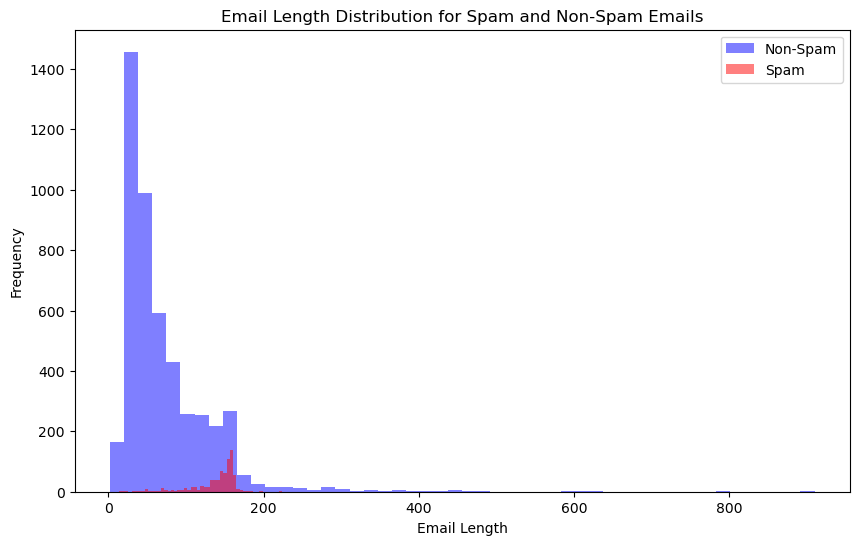

In [26]:
# EDA: Email length analysis for spam and non-spam emails
df['email_length'] = df['v2'].apply(len)

# Plot histograms for email length based on spam and non-spam labels
plt.figure(figsize=(10, 6))
df[df['v1'] == 0]['email_length'].plot(kind='hist', bins=50, alpha=0.5, label='Non-Spam', color='blue')
df[df['v1'] == 1]['email_length'].plot(kind='hist', bins=50, alpha=0.5, label='Spam', color='red')
plt.xlabel('Email Length')
plt.ylabel('Frequency')
plt.title('Email Length Distribution for Spam and Non-Spam Emails')
plt.legend()
plt.show()


How can we explore the distribution of class labels in the dataset?

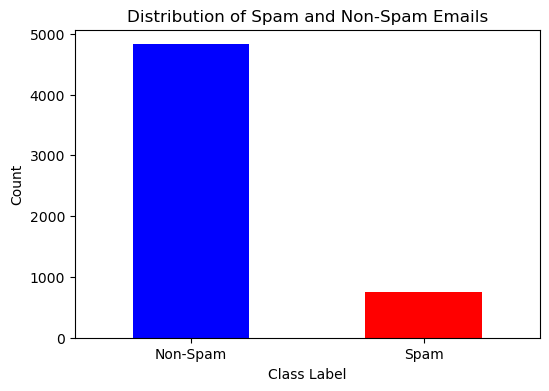

In [27]:
# EDA: Distribution of class labels
plt.figure(figsize=(6, 4))
df['v1'].value_counts().plot(kind='bar', color=['blue', 'red'])
plt.xticks([0, 1], ['Non-Spam', 'Spam'], rotation='horizontal')
plt.xlabel('Class Label')
plt.ylabel('Count')
plt.title('Distribution of Spam and Non-Spam Emails')
plt.show()


How can we visualize the correlation matrix to identify potential multicollinearity?

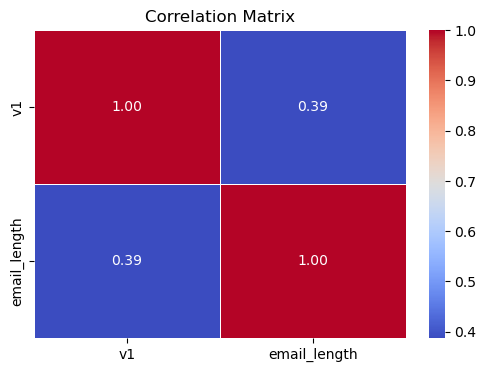

In [28]:
import seaborn as sns
# EDA: Visualize the correlation matrix
correlation_matrix = df[['v1', 'email_length']].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


How can we analyze the distribution of predicted probabilities for spam emails?

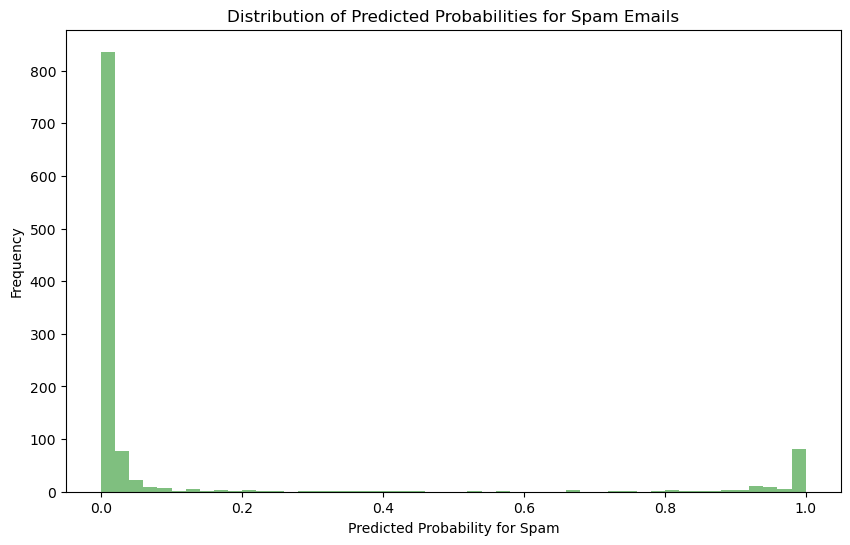

In [29]:
# EDA: Distribution of predicted probabilities for spam emails
# Assuming we have a model named 'model' already trained

# Get predicted probabilities for spam emails
spam_probabilities = model.predict_proba(X_test)[:, 1]

# Plot histogram of predicted probabilities
plt.figure(figsize=(10, 6))
plt.hist(spam_probabilities, bins=50, color='green', alpha=0.5)
plt.xlabel('Predicted Probability for Spam')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities for Spam Emails')
plt.show()


How can we visualize the change in model performance with varying feature thresholds?

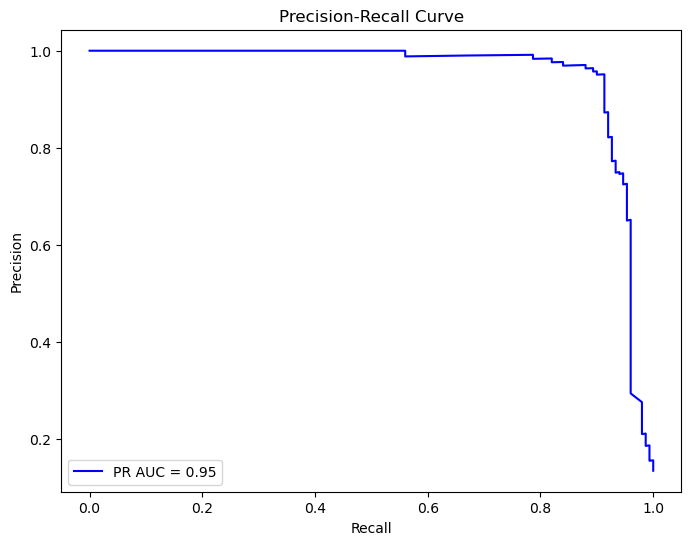

In [30]:
# Example: Visualizing the change in model performance with varying feature thresholds
from sklearn.metrics import precision_recall_curve, auc

# Get predicted probabilities for spam emails
spam_probabilities = model.predict_proba(X_test)[:, 1]

# Generate precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, spam_probabilities)

# Calculate area under the curve (AUC)
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


How can we analyze the impact of varying the decision threshold on model performance?

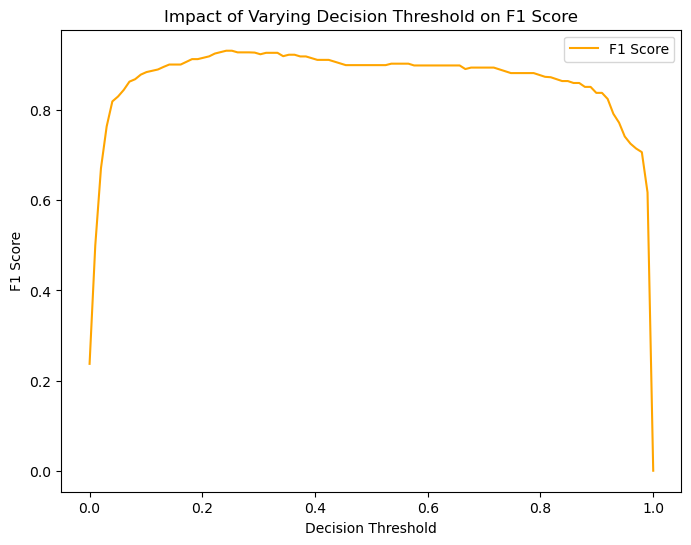

In [31]:
# Example: Analyzing the impact of varying the decision threshold on model performance
from sklearn.metrics import f1_score

# Vary the decision threshold and calculate F1 score for each threshold
thresholds = np.linspace(0, 1, 100)
f1_scores = [f1_score(y_test, (spam_probabilities > threshold).astype(int)) for threshold in thresholds]

# Plot the impact of varying decision threshold on F1 score
plt.figure(figsize=(8, 6))
plt.plot(thresholds, f1_scores, color='orange', label='F1 Score')
plt.xlabel('Decision Threshold')
plt.ylabel('F1 Score')
plt.title('Impact of Varying Decision Threshold on F1 Score')
plt.legend()
plt.show()


How can we handle and visualize outliers in the email length feature?

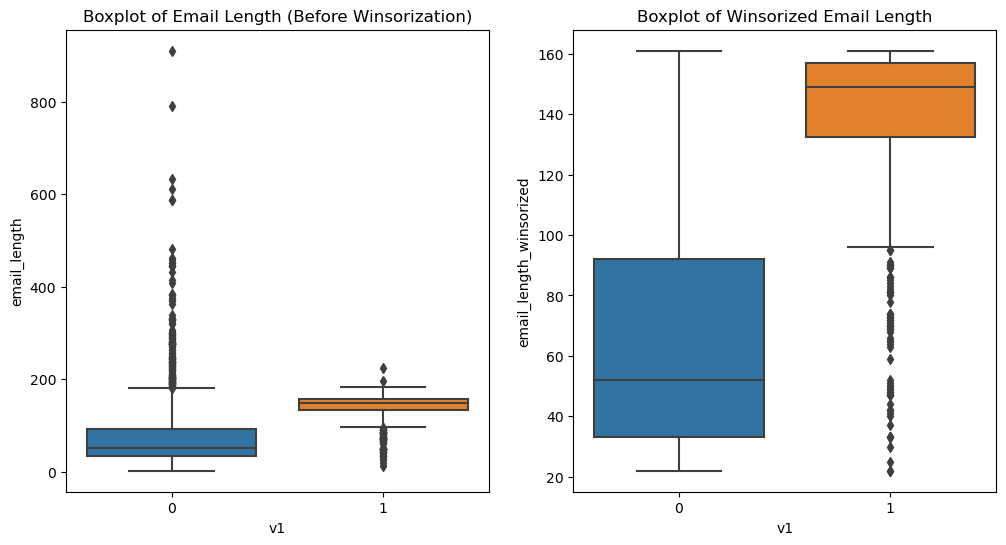

In [32]:
# Example: Handle outliers in the email length feature using winsorization
from scipy.stats.mstats import winsorize

# Winsorize the email length to limit the impact of outliers
df['email_length_winsorized'] = winsorize(df['email_length'], limits=[0.05, 0.05])

# Plot boxplots before and after winsorization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='v1', y='email_length', data=df)
plt.title('Boxplot of Email Length (Before Winsorization)')

plt.subplot(1, 2, 2)
sns.boxplot(x='v1', y='email_length_winsorized', data=df)
plt.title('Boxplot of Winsorized Email Length')
plt.show()


How can we analyze the impact of different n-gram configurations on model performance?

In [34]:
# Example: Analyze the impact of different n-gram configurations on model performance
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Build a pipeline with CountVectorizer and Lasso Logistic Regression
model_ngram = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression(penalty='l1', solver='liblinear'))
])

# Define different n-gram configurations
param_grid = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]
}

# Perform grid search with cross-validation to find the best n-gram configuration
grid_search_ngram = GridSearchCV(model_ngram, param_grid, cv=5, scoring='accuracy')
grid_search_ngram.fit(df['v2'], df['v1'])

# Display the best n-gram configuration
best_ngram_config = grid_search_ngram.best_params_['vectorizer__ngram_range']
print(f"\nBest N-gram Configuration: {best_ngram_config}")

# Display the corresponding accuracy
best_accuracy_ngram = grid_search_ngram.best_score_
print(f"Accuracy with Best N-gram Configuration: {best_accuracy_ngram:.2%}")



Best N-gram Configuration: (1, 2)
Accuracy with Best N-gram Configuration: 98.04%


How can we analyze the impact of different regularization strengths and n-gram configurations simultaneously?

In [ ]:
# Example: Analyze the impact of different regularization strengths and n-gram configurations simultaneously
param_grid_combined = {
    'vectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)],
    'classifier__C': [0.1, 1, 10]
}

# Build a pipeline with CountVectorizer and Lasso Logistic Regression
model_combined = Pipeline([
    ('vectorizer', CountVectorizer()),
    ('classifier', LogisticRegression(penalty='l1', solver='liblinear'))
])

# Perform grid search with cross-validation to find the best combination of parameters
grid_search_combined = GridSearchCV(model_combined, param_grid_combined, cv=5, scoring='accuracy')
grid_search_combined.fit(df['v2'], df['v1'])

# Display the best combination of parameters
best_params_combined = grid_search_combined.best_params_
print("\nBest Combination of Parameters:")
print(best_params_combined)

# Display the corresponding accuracy
best_accuracy_combined = grid_search_combined.best_score_
print(f"Accuracy with Best Combination of Parameters: {best_accuracy_combined:.2%}")
